In [2]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")


한글 폰트 설정이 완료되었습니다.


In [3]:
# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
# dataframe 확인해라!
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


데이터 로드 및 통합이 완료되었습니다.


In [13]:
# 문제 2: 고객별 재주문까지 걸리는 평균 시간을 분석하고, 가장 재구매 주기가 짧은 충성 고객 TOP 5를 찾으세요.
# 시각화: 바 차트

# 비즈니스 목적: 고객의 재구매 주기를 파악하여, 주기에 맞춘 리마인드 알림이나 프로모션을 통해 고객의 이탈을 방지하고 재구매를 유도합니다.

In [52]:
# 출력 결과를 보고 코딩하세요
# Q: 고객별 재주문까지 걸리는 평균 시간을 분석하고, 가장 재구매 주기가 짧은 충성 고객 TOP 5를 찾으세요.
# df.columns
''' 
Index(['order_id', 'customer_id', 'product_id', 'order_date', 'quantity',
       'payment_id', 'payment_method', 'payment_status', 'payment_date',
       'product_name', 'category', 'price', 'stock', 'name', 'gender', 'age',
       'join_date', 'city', 'shipping_id', 'shipping_company',
       'shipping_status', 'shipping_start_date', 'shipping_end_date',
       'total_sales', 'year_month'],
      dtype='object')
'''

# 고객별, 주문일자를 groupby 하고 그 주문일자의 간격을 구하고, 평균시간을 일자로 정리하기 
# 고객별 재구매 평균 시간 계산

avg_repurchase_time_top5 = (
    df.sort_values(['customer_id', 'order_date']) 
    .groupby('customer_id')['order_date']
    .apply(lambda x: x.diff().dt.days.mean() if len(x) > 1 else np.nan)
    .rename('time_since_last_order')
    .sort_values()
)
# 출력물에 있는 이름으로 시리즈 변경
# avg_repurchase_time_top5.name = 'time_since_last_order'
# TOP5 만 가져오기 (그래프를 그리기 위해서 )
time_since_last_order_top5 = avg_repurchase_time_top5.head()

print(f'재구매 주기가 가장 짧은 고객 TOP 5 (일):')
# avg_repurchase_time.head()
time_since_last_order_top5


재구매 주기가 가장 짧은 고객 TOP 5 (일):


customer_id
C0473    1.0
C0204    4.0
C0940    5.0
C0401    5.0
C1892    5.0
Name: time_since_last_order, dtype: float64

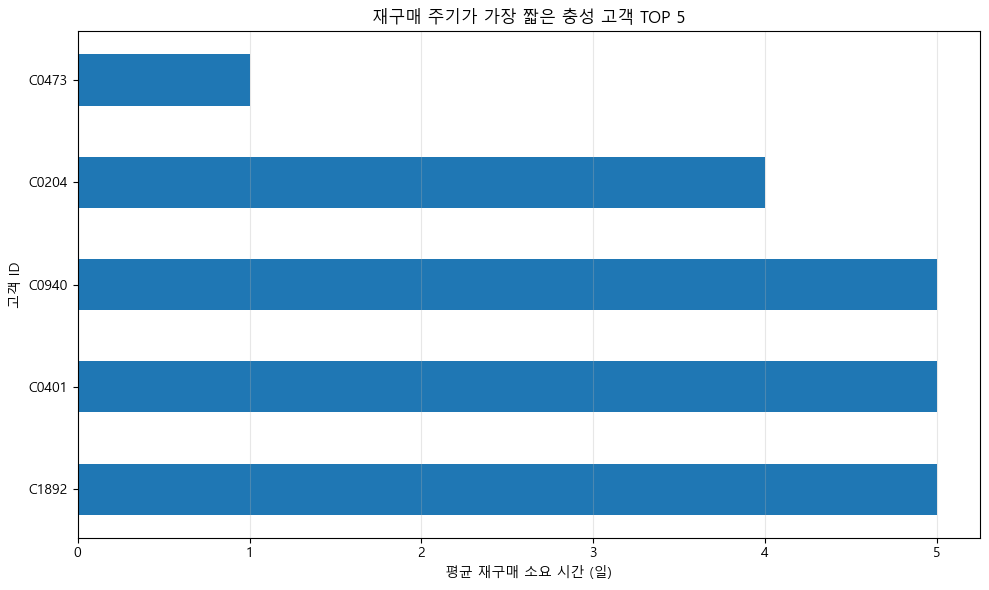

In [ ]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
# barh 그래프 선택 
plt.barh(
  time_since_last_order_top5.index    # x축 
  , time_since_last_order_top5.values # y축
  , height=0.5                        # barh 하나당 height
  )
# y축 역순으로 그리기 
plt.gca().invert_yaxis()

plt.xlabel('평균 재구매 소요 시간 (일)')
plt.ylabel('고객 ID')
plt.title('재구매 주기가 가장 짧은 충성 고객 TOP 5')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()
